Notebook for analyzing the distribution of dendritic spikes across random_seed & depth_of_modulation

In [1]:
# sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-01-13-14-26-16-BenSynapses_testing_depth_of_mod"
# sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-01-11-40-BenSynapses_testing_new_tuning"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-13-12-46-measuring_across_rhyths_across_seeds"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-14-08-52-all3_stas_multiple_seeds"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-17-09-57-all3_stas_multiple_seeds_NoMapping"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-20-20-34-full_sim_rhyth_across_seeds"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-10-30-full_reduced_sim"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-12-07-tuning_detailed_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-15-34-tuning_detailed_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-16-42-tuning_detailed_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-18-59-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-20-17-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-21-22-33-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-22-04-12-reduced_rhyth_fr"
# sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-22-08-38-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-22-08-38-Basal_density_100"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-22-18-10-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-22-23-05-reduced_rhyth_fr"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-23-01-42-Basal_density_1025"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-23-08-10-Basal_density_1035"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-23-15-25-complex_baseline_fr"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-24-13-31-complex_rhyth_50sec"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-24-19-37-complex_rhyth_50sec_0015depth"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-27-21-34-Detailed_sta_run"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-28-00-42-Reduced_sta_run"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-30-17-28-Detailed_tuning_down_dSpikes_lower_Ca_nexus"

sim_directory = "2025-03-30-22-12-Detailed_tuning_down_dSpikes_lower_Ca_nexus"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-30-23-43-Detailed_tuning_down_dSpikes_lower_Ca_nexus"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-31-10-18-Running_STA"

In [2]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [3]:
# from count_spikes_across_seeds import count_events
from count_spikes_across_seeds import aggregate_simulation_data

In [27]:
# Generate .csv's for dendritic events
!python find_events_ben.py -f {sim_directory}

simulations_directory: /home/drfrbc/Neural-Modeling/scripts/2025-03-31-10-18-Running_STA
sim_directory: sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.2310_0.2750_0.0572_0.2200_0.2310_ExcTuftDensity0.4860_0.4860_0.1080_0.5400_0.6026_Np5000
sim_directory: Rates_by_RhythDep_AcrossSeeds
 skipping directory because no parameters (likely an analysis folder instead of simulation): /home/drfrbc/Neural-Modeling/scripts/2025-03-31-10-18-Running_STA/Rates_by_RhythDep_AcrossSeeds


In [28]:
import sys
import os
sys.path.append(os.path.abspath(".."))
sys.path.append(os.path.abspath("../Modules"))
from Modules import synapse

In [6]:
spike_table = aggregate_simulation_data(sim_directory)

/home/drfrbc/Neural-Modeling/scripts/count_spikes_across_seeds.py:224: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  ca_df = pd.read_csv(os.path.join(sim_path, 'ca.csv'))
/home/drfrbc/Neural-Modeling/scripts/count_spikes_across_seeds.py:242: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  nmda_df = pd.read_csv(os.path.join(sim_path, 'nmda.csv'))


In [7]:
# record soma firing rates, depth of modulations.

from Modules import analysis
# Initialize a list to store soma firing rates
soma_firing_rates = []
distal_rhyth_depths = []
perisomatic_rhyth_depths = []

# Compute the soma firing rate for each simulation directory
for sim_dir in spike_table.simulation_directory:
    sim_path = os.path.join(sim_directory, sim_dir)
    
    # Read soma spikes data
    spks = analysis.DataReader.read_data(sim_path, "soma_spikes")
    
    # Load simulation parameters to get h_tstop
    params = analysis.DataReader.load_parameters(sim_path)
    
    # Calculate soma firing rate
    firing_rate = len(spks[0][:]) / (params.h_tstop / 1000)  # Convert ms to seconds
    soma_firing_rates.append(firing_rate)

    distal_rhyth_depths.append(params.rhyth_depth_inh_distal)
    perisomatic_rhyth_depths.append(params.rhyth_depth_inh_perisomatic)

# Add the soma firing rate column to spike_table
spike_table['soma_firing_rate'] = soma_firing_rates
spike_table['perisomatic_rhyth_depth'] = perisomatic_rhyth_depths
spike_table['distal_rhyth_depth'] = distal_rhyth_depths

   distal_rhyth_depth  perisomatic_rhyth_depth Segment_Type  \
0               0.015                    0.015         apic   
1               0.015                    0.015         dend   

   Total_NMDA_Spikes_mean  Total_NMDA_Spikes_std  Total_NA_Spikes_mean  \
0                 2149.94                    NaN                 33.74   
1                  693.58                    NaN                395.00   

   Total_NA_Spikes_std  Total_CA_Spikes_mean  Total_CA_Spikes_std  \
0                  NaN                432.58                  NaN   
1                  NaN                  0.00                  NaN   

   soma_firing_rate_mean  soma_firing_rate_std  
0                   2.64                   NaN  
1                   2.64                   NaN  


/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


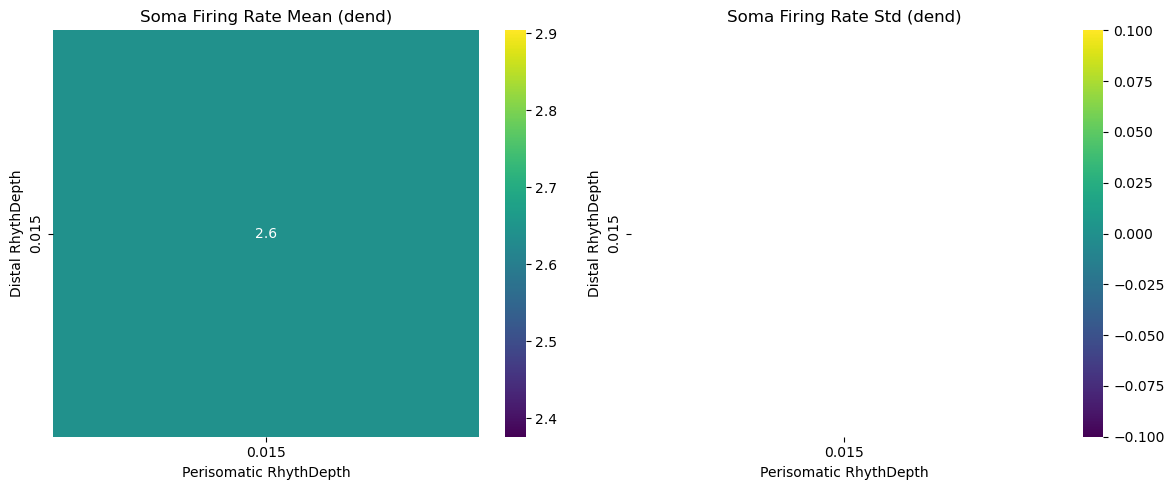

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


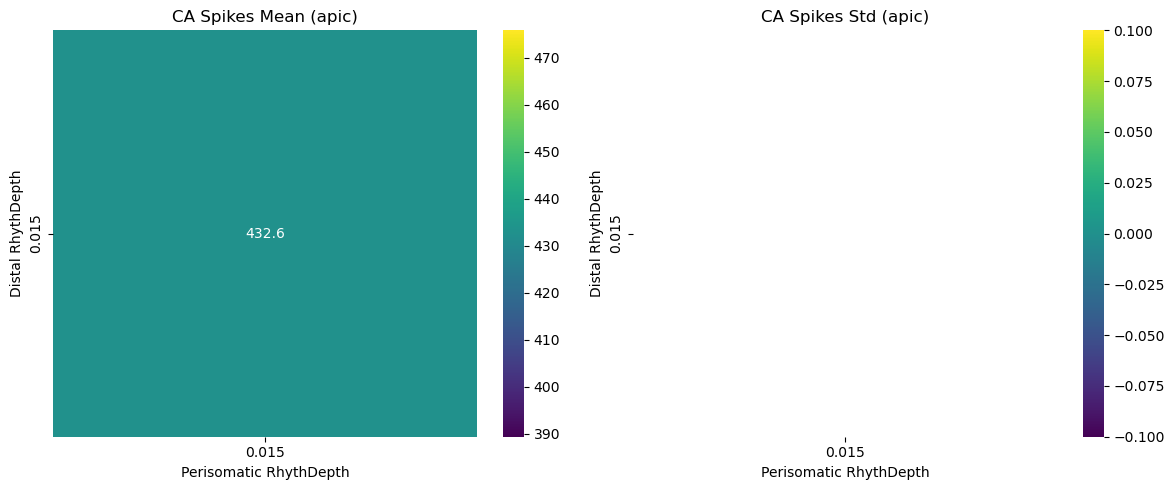

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


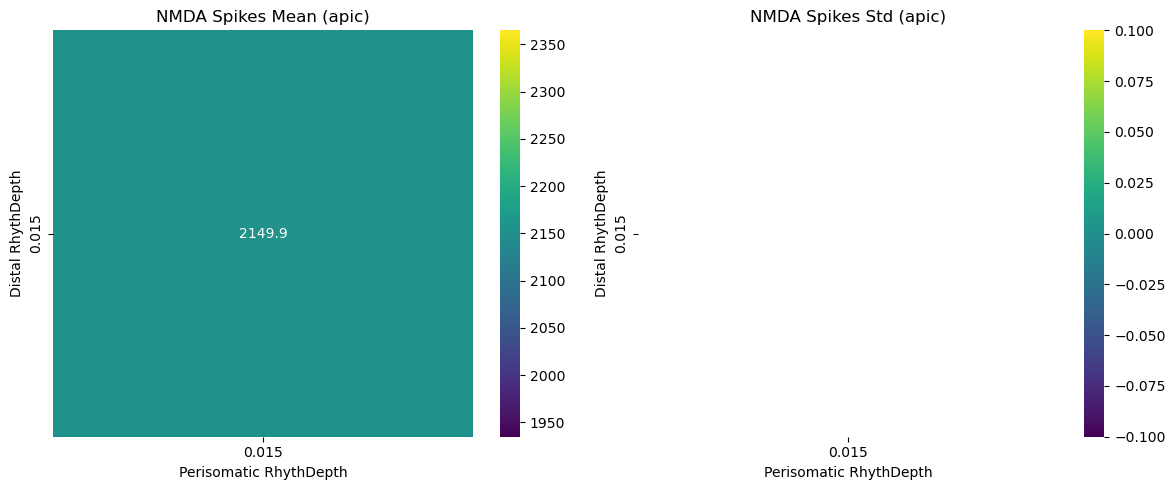

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


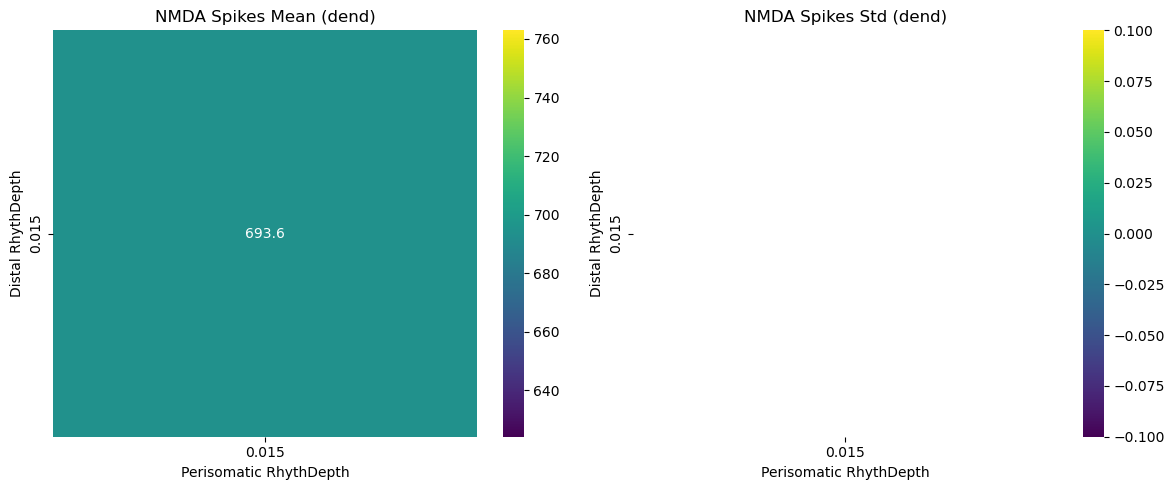

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


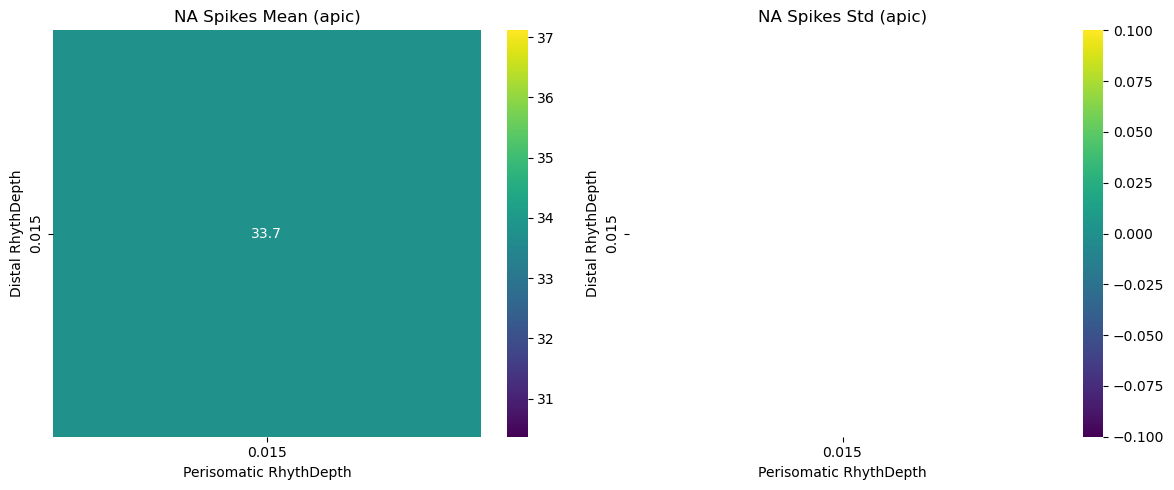

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


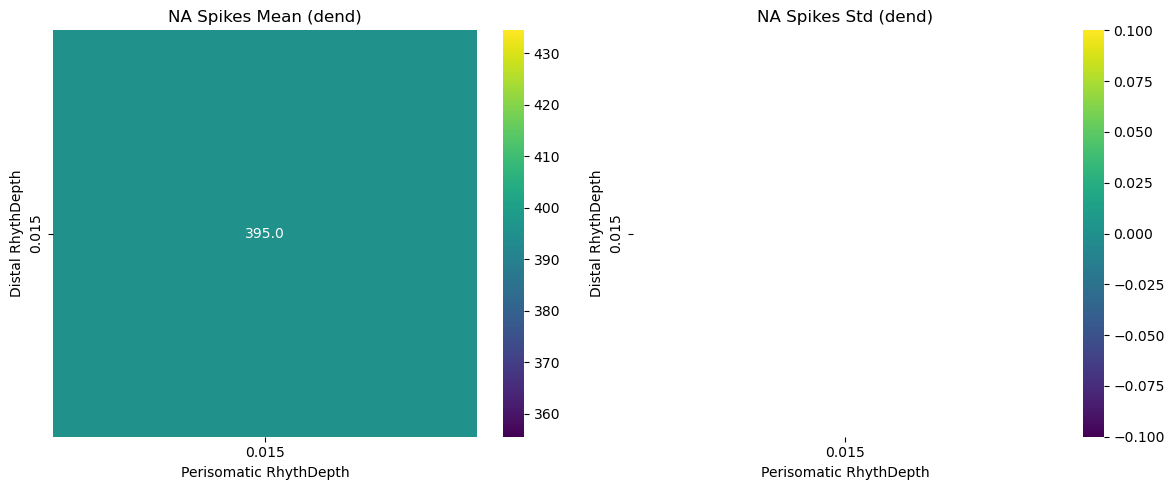

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

save_folder = os.path.join(sim_directory, f'Rates_by_RhythDep_AcrossSeeds/')
# create save folder if it does not exist
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# --- 1. Grouping by both rhythmic depth variables ---
# Adjust the grouping to use both distal and perisomatic rhythmic depths
grouped_stats = spike_table.groupby(
    ['distal_rhyth_depth', 'perisomatic_rhyth_depth', 'Segment_Type']
)[['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes', 'soma_firing_rate']].agg(['mean', 'std'])

# Flatten the multi-index columns (e.g. Total_NMDA_Spikes_mean)
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats = grouped_stats.reset_index()

print(grouped_stats.head())

grouped_stats.to_csv(os.path.join(save_folder,'spike_rate_df.csv'))

# --- 2. Plotting the metrics as a function of both variables via heatmaps ---

# --- Plotting Soma Firing Rate ---
for segment_type in grouped_stats['Segment_Type'].unique():
    if segment_type == 'apic':
        continue
    subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
    pivot_mean = subset.pivot(index='distal_rhyth_depth', 
                              columns='perisomatic_rhyth_depth', 
                              values='soma_firing_rate_mean')
    pivot_std = subset.pivot(index='distal_rhyth_depth', 
                             columns='perisomatic_rhyth_depth', 
                             values='soma_firing_rate_std')
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.heatmap(pivot_mean, ax=axes[0], cmap="viridis", annot=True, fmt=".1f")
    axes[0].set_title(f'Soma Firing Rate Mean ({segment_type})')
    axes[0].set_xlabel('Perisomatic RhythDepth')
    axes[0].set_ylabel('Distal RhythDepth')
    
    sns.heatmap(pivot_std, ax=axes[1], cmap="viridis", annot=True, fmt=".1f")
    axes[1].set_title(f'Soma Firing Rate Std ({segment_type})')
    axes[1].set_xlabel('Perisomatic RhythDepth')
    axes[1].set_ylabel('Distal RhythDepth')
    
    plt.tight_layout()
    plt.savefig(os.path.join(save_folder, f'{segment_type}_somaFR_mean_std'))
    plt.show()

# List of spike types and titles for plots
spike_types = ['Total_CA_Spikes', 'Total_NMDA_Spikes', 'Total_NA_Spikes']
titles = ['CA Spikes', 'NMDA Spikes', 'NA Spikes']

# Loop over each spike type and each segment type to create heatmaps for mean and std
for spike_type, title in zip(spike_types, titles):
    for segment_type in grouped_stats['Segment_Type'].unique():
        if (segment_type == 'dend' and spike_type == 'Total_CA_Spikes') or (segment_type == 'apic' and spike_type == 'soma_firing_rate'):
            continue
        # Subset the data for this segment type
        subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
        
        # Pivot so rows are distal and columns are perisomatic rhythmic depth
        pivot_mean = subset.pivot(index='distal_rhyth_depth', 
                                  columns='perisomatic_rhyth_depth', 
                                  values=f'{spike_type}_mean')
        pivot_std = subset.pivot(index='distal_rhyth_depth', 
                                 columns='perisomatic_rhyth_depth', 
                                 values=f'{spike_type}_std')
        
        # Create a figure with two subplots: one for mean and one for std
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        sns.heatmap(pivot_mean, ax=axes[0], cmap="viridis", annot=True, fmt=".1f")
        axes[0].set_title(f'{title} Mean ({segment_type})')
        axes[0].set_xlabel('Perisomatic RhythDepth')
        axes[0].set_ylabel('Distal RhythDepth')
        
        sns.heatmap(pivot_std, ax=axes[1], cmap="viridis", annot=True, fmt=".1f")
        axes[1].set_title(f'{title} Std ({segment_type})')
        axes[1].set_xlabel('Perisomatic RhythDepth')
        axes[1].set_ylabel('Distal RhythDepth')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_folder, f'{segment_type}_{spike_type}_mean_std'))
        plt.show()


FanoFactor

In [9]:
grouped_stats = spike_table.groupby(
    ['distal_rhyth_depth', 'perisomatic_rhyth_depth', 'Segment_Type']
)[['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes', 'soma_firing_rate']].agg(['mean', 'std', 'var'])

# Compute Fano Factor as variance divided by mean
for col in ['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes', 'soma_firing_rate']:
    grouped_stats[(col, 'fano_factor')] = grouped_stats[(col, 'var')] / grouped_stats[(col, 'mean')]
    grouped_stats[(col, 'coeff_of_var')] = grouped_stats[(col, 'std')] / grouped_stats[(col, 'mean')]

grouped_stats.reset_index(inplace=True)

In [10]:
# sort the columns so that the fanofactor is among the mean, std, var columns
grouped_stats = grouped_stats.reindex(sorted(grouped_stats.columns), axis=1)

In [11]:
grouped_stats
grouped_stats.to_csv(os.path.join(save_folder,'spike_rate_CV_df.csv'))

In [12]:
for spike_type, stat in grouped_stats.keys():
    print(f"{spike_type} {stat}")

Segment_Type 
Total_CA_Spikes coeff_of_var
Total_CA_Spikes fano_factor
Total_CA_Spikes mean
Total_CA_Spikes std
Total_CA_Spikes var
Total_NA_Spikes coeff_of_var
Total_NA_Spikes fano_factor
Total_NA_Spikes mean
Total_NA_Spikes std
Total_NA_Spikes var
Total_NMDA_Spikes coeff_of_var
Total_NMDA_Spikes fano_factor
Total_NMDA_Spikes mean
Total_NMDA_Spikes std
Total_NMDA_Spikes var
distal_rhyth_depth 
perisomatic_rhyth_depth 
soma_firing_rate coeff_of_var
soma_firing_rate fano_factor
soma_firing_rate mean
soma_firing_rate std
soma_firing_rate var


/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


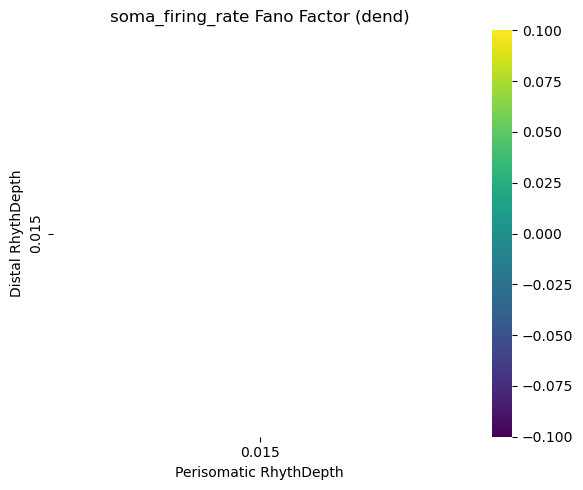

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


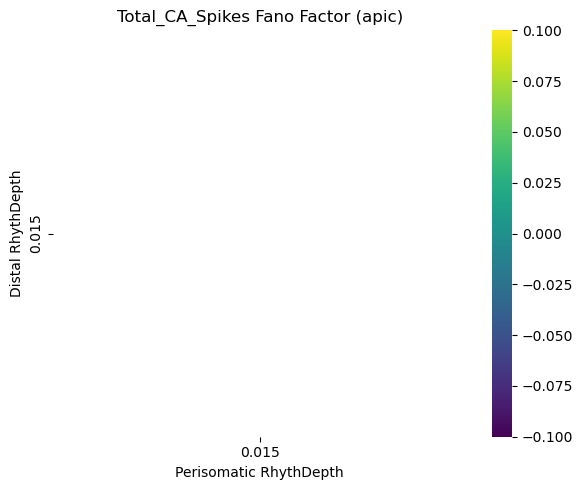

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


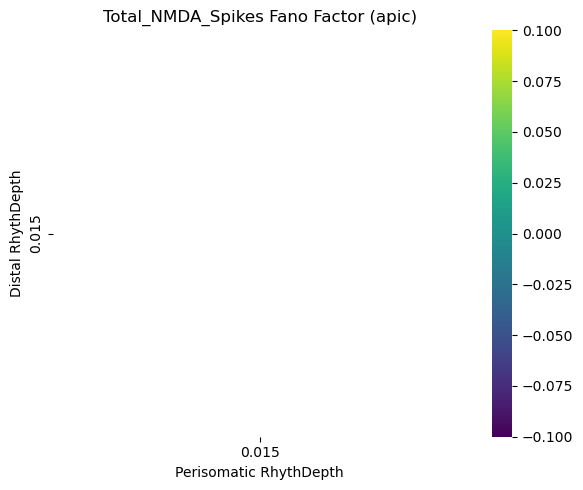

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


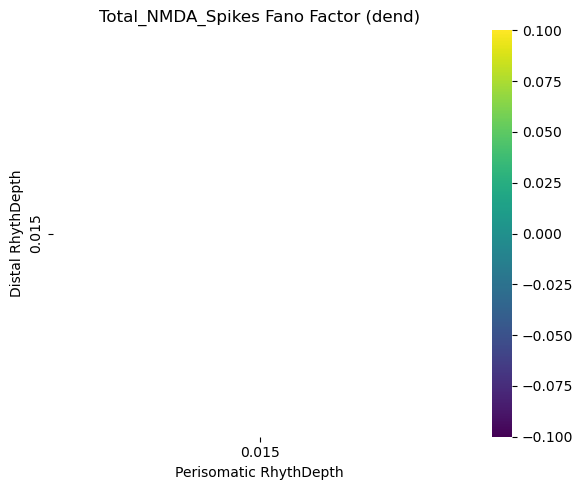

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


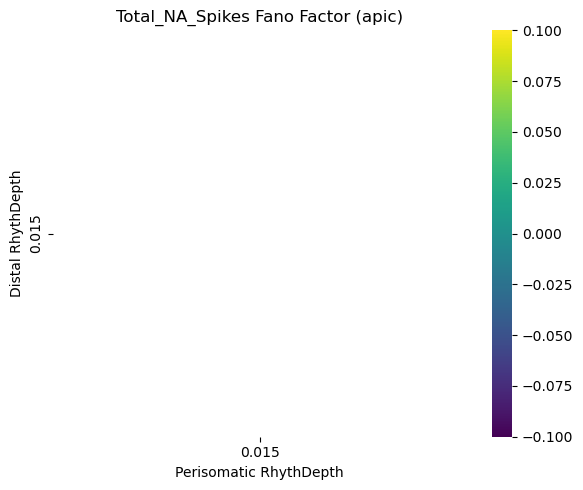

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


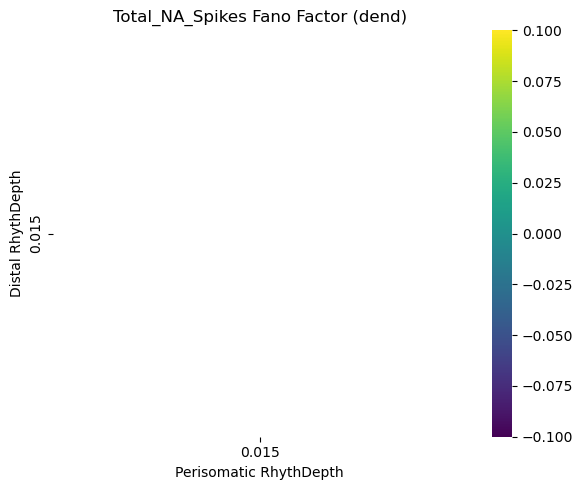

In [13]:
statistic = ['Fano Factor', 'Coeff of Var'][0]
statistic_var = ['fano_factor', 'coeff_of_var'][0]
# visualize the Fano Factor for each spike type and segment type by rhythmic depth
for spike_type in ['soma_firing_rate', 'Total_CA_Spikes', 'Total_NMDA_Spikes', 'Total_NA_Spikes']:
    for segment_type in grouped_stats['Segment_Type'].unique():
        if (segment_type == 'dend' and spike_type == 'Total_CA_Spikes') or (segment_type == 'apic' and spike_type == 'soma_firing_rate'):
            continue
        subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
        pivot_mean = subset.pivot(index='distal_rhyth_depth', 
                                  columns='perisomatic_rhyth_depth', 
                                  values=(spike_type, statistic_var))
        
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        sns.heatmap(pivot_mean, ax=ax, cmap="viridis", annot=True, fmt=".1f")
        ax.set_title(f'{spike_type} {statistic} ({segment_type})')
        ax.set_xlabel('Perisomatic RhythDepth')
        ax.set_ylabel('Distal RhythDepth')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_folder, f'{segment_type}_{spike_type}_{statistic_var}'))
        plt.show()

In [14]:
params.exc_syn_properties['distal_basal']['syn_density']/2.16

0.279

In [15]:
params.h_tstop

50000

In [16]:
from count_spikes_across_seeds import count_events

table = count_events("2025-03-30-22-12-Detailed_tuning_down_dSpikes_lower_Ca_nexus/sta_Complex_DepthPeriInh0.0150_DepthDistalInh0.0150_InhTuftDensity0.3300_0.2310_0.2750_0.0550_0.2200_0.2310_ExcTuftDensity0.4860_0.4860_0.1080_0.5400_0.6026_Np5000")

In [17]:
%ls

 2024-10-11-14-32-54-BenSynapses_final_detailed150sec/
 2024-10-12-00-28-34-ZiaoSynapses_final_detailed_refactored150sec/
 2024-12-17-16-16-39-ZiaoSynapses_final_detailed_syn_dist_analysis/
 2024-12-23-15-23-44-BenSynapses_final_detailed_syn_dist_analysis/
 2025-02-01-11-40-BenSynapses_testing_new_tuning/
 2025-02-11-11-02-testing_new_weights/
 2025-02-12-15-45-testing_increasing_apic_inh/
 2025-02-12-16-26-testing_remove_rhyth/
 2025-02-13-09-17-add_1percent_rhyth_check_FR/
 2025-02-13-09-36-increase_apicInh1x_increasebasalExc0point1x/
 2025-02-13-09-51-increase_apicInh1x_increasebasalExc0point1x_again/
 2025-03-07-17-06-testing_reduction/
 2025-03-10-09-34-getting_mediuem_res_segment_info/
 2025-03-14-08-40-checking_syn_density_tuning/
 2025-03-14-08-52-all3_stas_multiple_seeds/
 2025-03-17-13-15-all3_stas_multiple_seeds_NoMapping/
 2025-03-17-21-00-stas_multiple_seeds_Mapping/
 2025-03-20-20-34-full_sim_rhyth_across_seeds/
 2025-03-21-22-33-reduced_rhyth_fr/
 2025-03-22-04-12-Basal_

In [18]:
table

,Segment_Type,Total_NMDA_Spikes_per_micron,Total_NMDA_Spikes,Total_NA_Spikes_per_micron,Total_NA_Spikes,Total_CA_Spikes_per_micron,Total_CA_Spikes
0,apic,349.760393,1684.8,13.398861,65.4,66.550023,328.4
1,dend,113.525266,557.4,82.133822,398.8,0.000000,0.0


Fano Factor calculated across windows within trial

In [19]:
# problem is that the spike times are not here... they were handled in aggregate_sim_data...
# start_time = min(spikes)
# end_time = max(spikes)
# window_step_size = 0.1 # second
# # window_size = 50 # second
# # window_start_times = np.arange(start_time, end_time + window_step_size, window_step_size)
# # window_end_times = window_start_times + window_size

# for window_size in [0.025, 0.08, 0.1, 1, 50]:
#   window_start_times = np.arange(start_time, end_time + window_step_size, window_step_size)
#   window_end_times = window_start_times + window_size
#   # get rid of windows outside of the data range
#   window_start_times = window_start_times[window_end_times <= end_time]
#   window_end_times = window_end_times[window_end_times <= end_time]

#   # count spikes in each window
#   spikes_in_each_window = np.zeros(window_start_times.size)
#   for i in range(window_start_times.size):
#     spikes_in_each_window[i] = len(spikes[(spikes >= window_start_times[i]) & (spikes < window_end_times[i])])

#   # print(spikes_in_each_window.mean())

#   rate_in_hz_in_each_window = spikes_in_each_window / window_size
#   # print(rate_in_hz_in_each_window)
#   mean_rate_in_hz_all_windows = rate_in_hz_in_each_window.mean()
#   # print(mean_rate_in_hz_all_windows)
#   std_rate_in_hz_all_windows = rate_in_hz_in_each_window.std()
#   # print(std_rate_in_hz_all_windows)
#   FF = std_rate_in_hz_all_windows**2 / mean_rate_in_hz_all_windows
#   print(f"window_size:{window_size} FF:{FF*window_size}")

### Previous work when RhythDepth was in the title of the simulation and assigned both values

In [20]:
# # # Extract the RhythDepthNNN value
# # spike_table['RhythDepth'] = spike_table['simulation_directory'].str.extract(r'RhythDepth(\S+)')

# # Group by RhythDepth and calculate mean and std
# grouped_stats = spike_table.groupby(['RhythDepth','Segment_Type'])[['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes', 'soma_firing_rate']].agg(['mean', 'std'])

# # Display the results
# grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]  # Flatten multi-index columns
# grouped_stats = grouped_stats.reset_index()
# print(grouped_stats)

In [21]:
# grouped_stats.head()

## dendritic spikes

In [22]:
# import matplotlib.pyplot as plt

# # Plotting code with shaded standard deviation
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# # Define spike types and corresponding mean and std column names
# spike_types = ['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes']
# titles = ['NMDA Spikes', 'NA Spikes', 'CA Spikes']

# # Create subplots for each spike type
# for ax, spike_type, title in zip(axes, spike_types, titles):
#     for segment_type in grouped_stats['Segment_Type'].unique():
#         subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
#         mean_col = f'{spike_type}_mean'
#         std_col = f'{spike_type}_std'

#         # Plot the mean line
#         ax.plot(
#             subset['RhythDepth'], 
#             subset[mean_col], 
#             marker='o', 
#             label=f'{segment_type}'
#         )

#         # Add shaded area for standard deviation
#         ax.fill_between(
#             subset['RhythDepth'],
#             subset[mean_col] - subset[std_col],
#             subset[mean_col] + subset[std_col],
#             alpha=0.2  # Transparency for shading
#         )

#     # Title and grid for the subplot
#     ax.set_title(f'{title} (Mean ± Std)', fontsize=14)
#     ax.set_xlabel('RhythDepth', fontsize=12)
#     ax.grid(True)

# # Add shared y-axis label
# axes[0].set_ylabel('Total Spikes', fontsize=12)

# # Add legend to the last subplot
# axes[-1].legend(title='Segment Type', fontsize=10)

# # Rotate x-axis labels
# for ax in axes:
#     ax.tick_params(axis='x', rotation=45)

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()


In [23]:
# import matplotlib.pyplot as plt

# # Plotting code with shaded standard deviation
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# # Define spike types and corresponding mean and std column names
# spike_types = ['Total_NMDA_Spikes', 'Total_NA_Spikes', 'Total_CA_Spikes']
# titles = ['NMDA Spikes', 'NA Spikes', 'CA Spikes']

# # Create subplots for each spike type
# for ax, spike_type, title in zip(axes, spike_types, titles):
#     for segment_type in grouped_stats['Segment_Type'].unique():
#         subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
#         mean_col = f'{spike_type}_mean'
#         std_col = f'{spike_type}_std'

#         # Plot the mean line
#         ax.plot(
#             subset['RhythDepth'], 
#             subset[std_col], 
#             marker='o', 
#             label=f'{segment_type}'
#         )

#         # # Add shaded area for standard deviation
#         # ax.fill_between(
#         #     subset['RhythDepth'],
#         #     subset[mean_col] - subset[std_col],
#         #     subset[mean_col] + subset[std_col],
#         #     alpha=0.2  # Transparency for shading
#         # )

#     # Title and grid for the subplot
#     ax.set_title(f'{title} (Std)', fontsize=14)
#     ax.set_xlabel('RhythDepth', fontsize=12)
#     ax.grid(True)

# # Add shared y-axis label
# axes[0].set_ylabel('Total Spikes', fontsize=12)

# # Add legend to the last subplot
# axes[-1].legend(title='Segment Type', fontsize=10)

# # Rotate x-axis labels
# for ax in axes:
#     ax.tick_params(axis='x', rotation=45)

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

## soma firing rate

In [24]:
# # Plotting code with shaded standard deviation
# fig, axes = plt.subplots(1,2,figsize=(18, 6), sharey=True)

# # Define spike types and corresponding mean and std column names
# spike_types = ['soma_firing_rate']
# titles = ['Soma Spike rate']

# # Create subplots for each spike type
# for ax, spike_type, title in zip(axes, spike_types, titles):
#     for segment_type in grouped_stats['Segment_Type'].unique():
#         subset = grouped_stats[grouped_stats['Segment_Type'] == segment_type]
#         mean_col = f'{spike_type}_mean'
#         std_col = f'{spike_type}_std'

#         # Plot the mean line
#         ax.plot(
#             subset['RhythDepth'], 
#             subset[mean_col], 
#             marker='o', 
#             label=f'{segment_type}'
#         )

#         # Add shaded area for standard deviation
#         ax.fill_between(
#             subset['RhythDepth'],
#             subset[mean_col] - subset[std_col],
#             subset[mean_col] + subset[std_col],
#             alpha=0.2  # Transparency for shading
#         )

#     # Title and grid for the subplot
#     ax.set_ylim([0,max(subset[mean_col] + subset[std_col])+5])
#     ax.set_title(f'{title} (Mean ± Std)', fontsize=14)
#     ax.set_xlabel('RhythDepth', fontsize=12)
#     ax.grid(True)

# # Add shared y-axis label
# axes[0].set_ylabel('Total Spikes', fontsize=12)

# # Add legend to the last subplot
# axes[-1].legend(title='Segment Type', fontsize=10)

# # Rotate x-axis labels
# for ax in axes:
#     ax.tick_params(axis='x', rotation=45)
# # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

In [25]:
# import pandas as pd
# na_df = pd.read_csv('/home/drfrbc/Neural-Modeling/scripts/2025-01-13-14-26-16-BenSynapses_testing_depth_of_mod/Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np100000_RhythDepth0/na.csv')

In [26]:
# na_df[na_df.section=='dend']